In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm
import warnings
from tqdm import tqdm
import re
import random
import pickle
from pathlib import Path
from typing import Any, Union
import os
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from tqdm import trange
from operator import itemgetter


# Example usage:
from functions import (
    compute_equilibrium,
    simulate_segment,
    plot_segment,
    run_invasion,
    global_invasability,
    local_invasibility,
    reconstruct_and_flow_map,
    flow_map
                       )                       


W_birth = 0.4
W_death = 0.1
Y_birth = 0.9
Y_death = 0.15

X_in = 0.1
X_out = 0.1
Z_in = 0.5
Z_out = 0.25

Time = 600.0
dt = 0.01

use_X = True
use_Z = False

num_points = 100
severity = 0.8
cycles = 5000
extinction_rate = 50
U_out = 0.21
U_in = 0.26
X_out = 0.26
X_in = 0.11

W,Y = compute_equilibrium(W_birth, W_death, Y_birth, Y_death)
W0 = W/2
X0 = W0 / (X_out / X_in)
V0 = W - W0
U0 = V0 / (U_out / U_in)
Y0 = Y
Z0 = Y0/ (Z_out /Z_in)
dt = 0.1

Computing local invasibility: 100%|██████████| 6/6 [00:45<00:00,  7.62s/it]


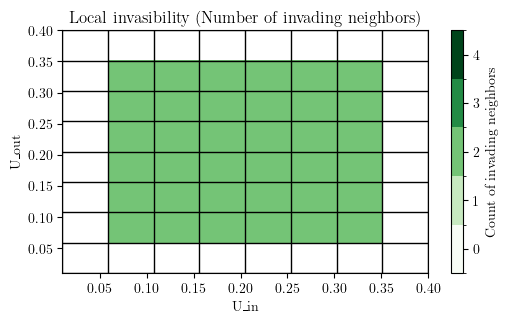

In [4]:
x = local_invasibility(
    V0, W0, Y0,
    W_birth, Y_birth, W_death, Y_death,
    Z_in, Z_out,
    extinction_rate, dt,
    use_X, use_Z,
    cycles, severity,
    grid_size=8,
    U_in_min  = 0.01,
    U_in_max  = 0.4, 
    U_out_min  = 0.01, 
    U_out_max  = 0.4,
    break_threshold=0.001,
    perturb_W=True,
    perturb_Y=False

)

Building Laplacian: 100%|██████████| 8/8 [00:00<00:00, 20984.64it/s]
/Users/xaverwangerpohl/anaconda3/envs/dreiAcht/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


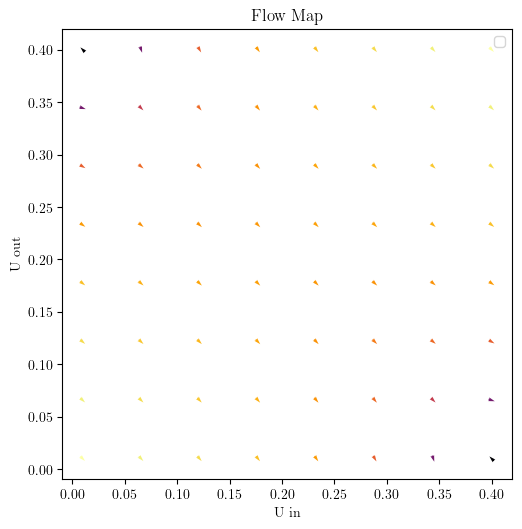

Saved flow map with tested data points to surface/flow_map_tested_points.pdf


In [5]:
preds = reconstruct_and_flow_map(
    x[3], x_vals=x[0], y_vals=x[1], folder='surface', arrow_scale=70, invert=True
)

Computing local invasibility: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]


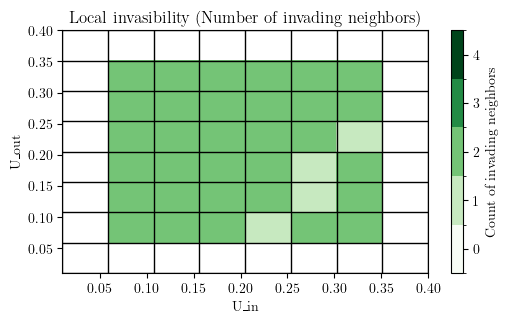

Computing local invasibility:  33%|███▎      | 2/6 [00:42<01:25, 21.42s/it]


KeyboardInterrupt: 

In [3]:
x = flow_map(
    V0, W0, Y0,
    W_birth, Y_birth, W_death, Y_death,
    Z_in, Z_out,
    extinction_rate, dt,
    use_X, use_Z,
    cycles, severity,
    grid_size=8,
    U_in_min  = 0.01,
    U_in_max  = 0.4, 
    U_out_min  = 0.01, 
    U_out_max  = 0.4,
    break_threshold=0.001,
    arrow_scale= 30

)